<a href="https://colab.research.google.com/github/codingmaniac1214/heart_disease_prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score , roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('heart_disease_data.csv')

In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


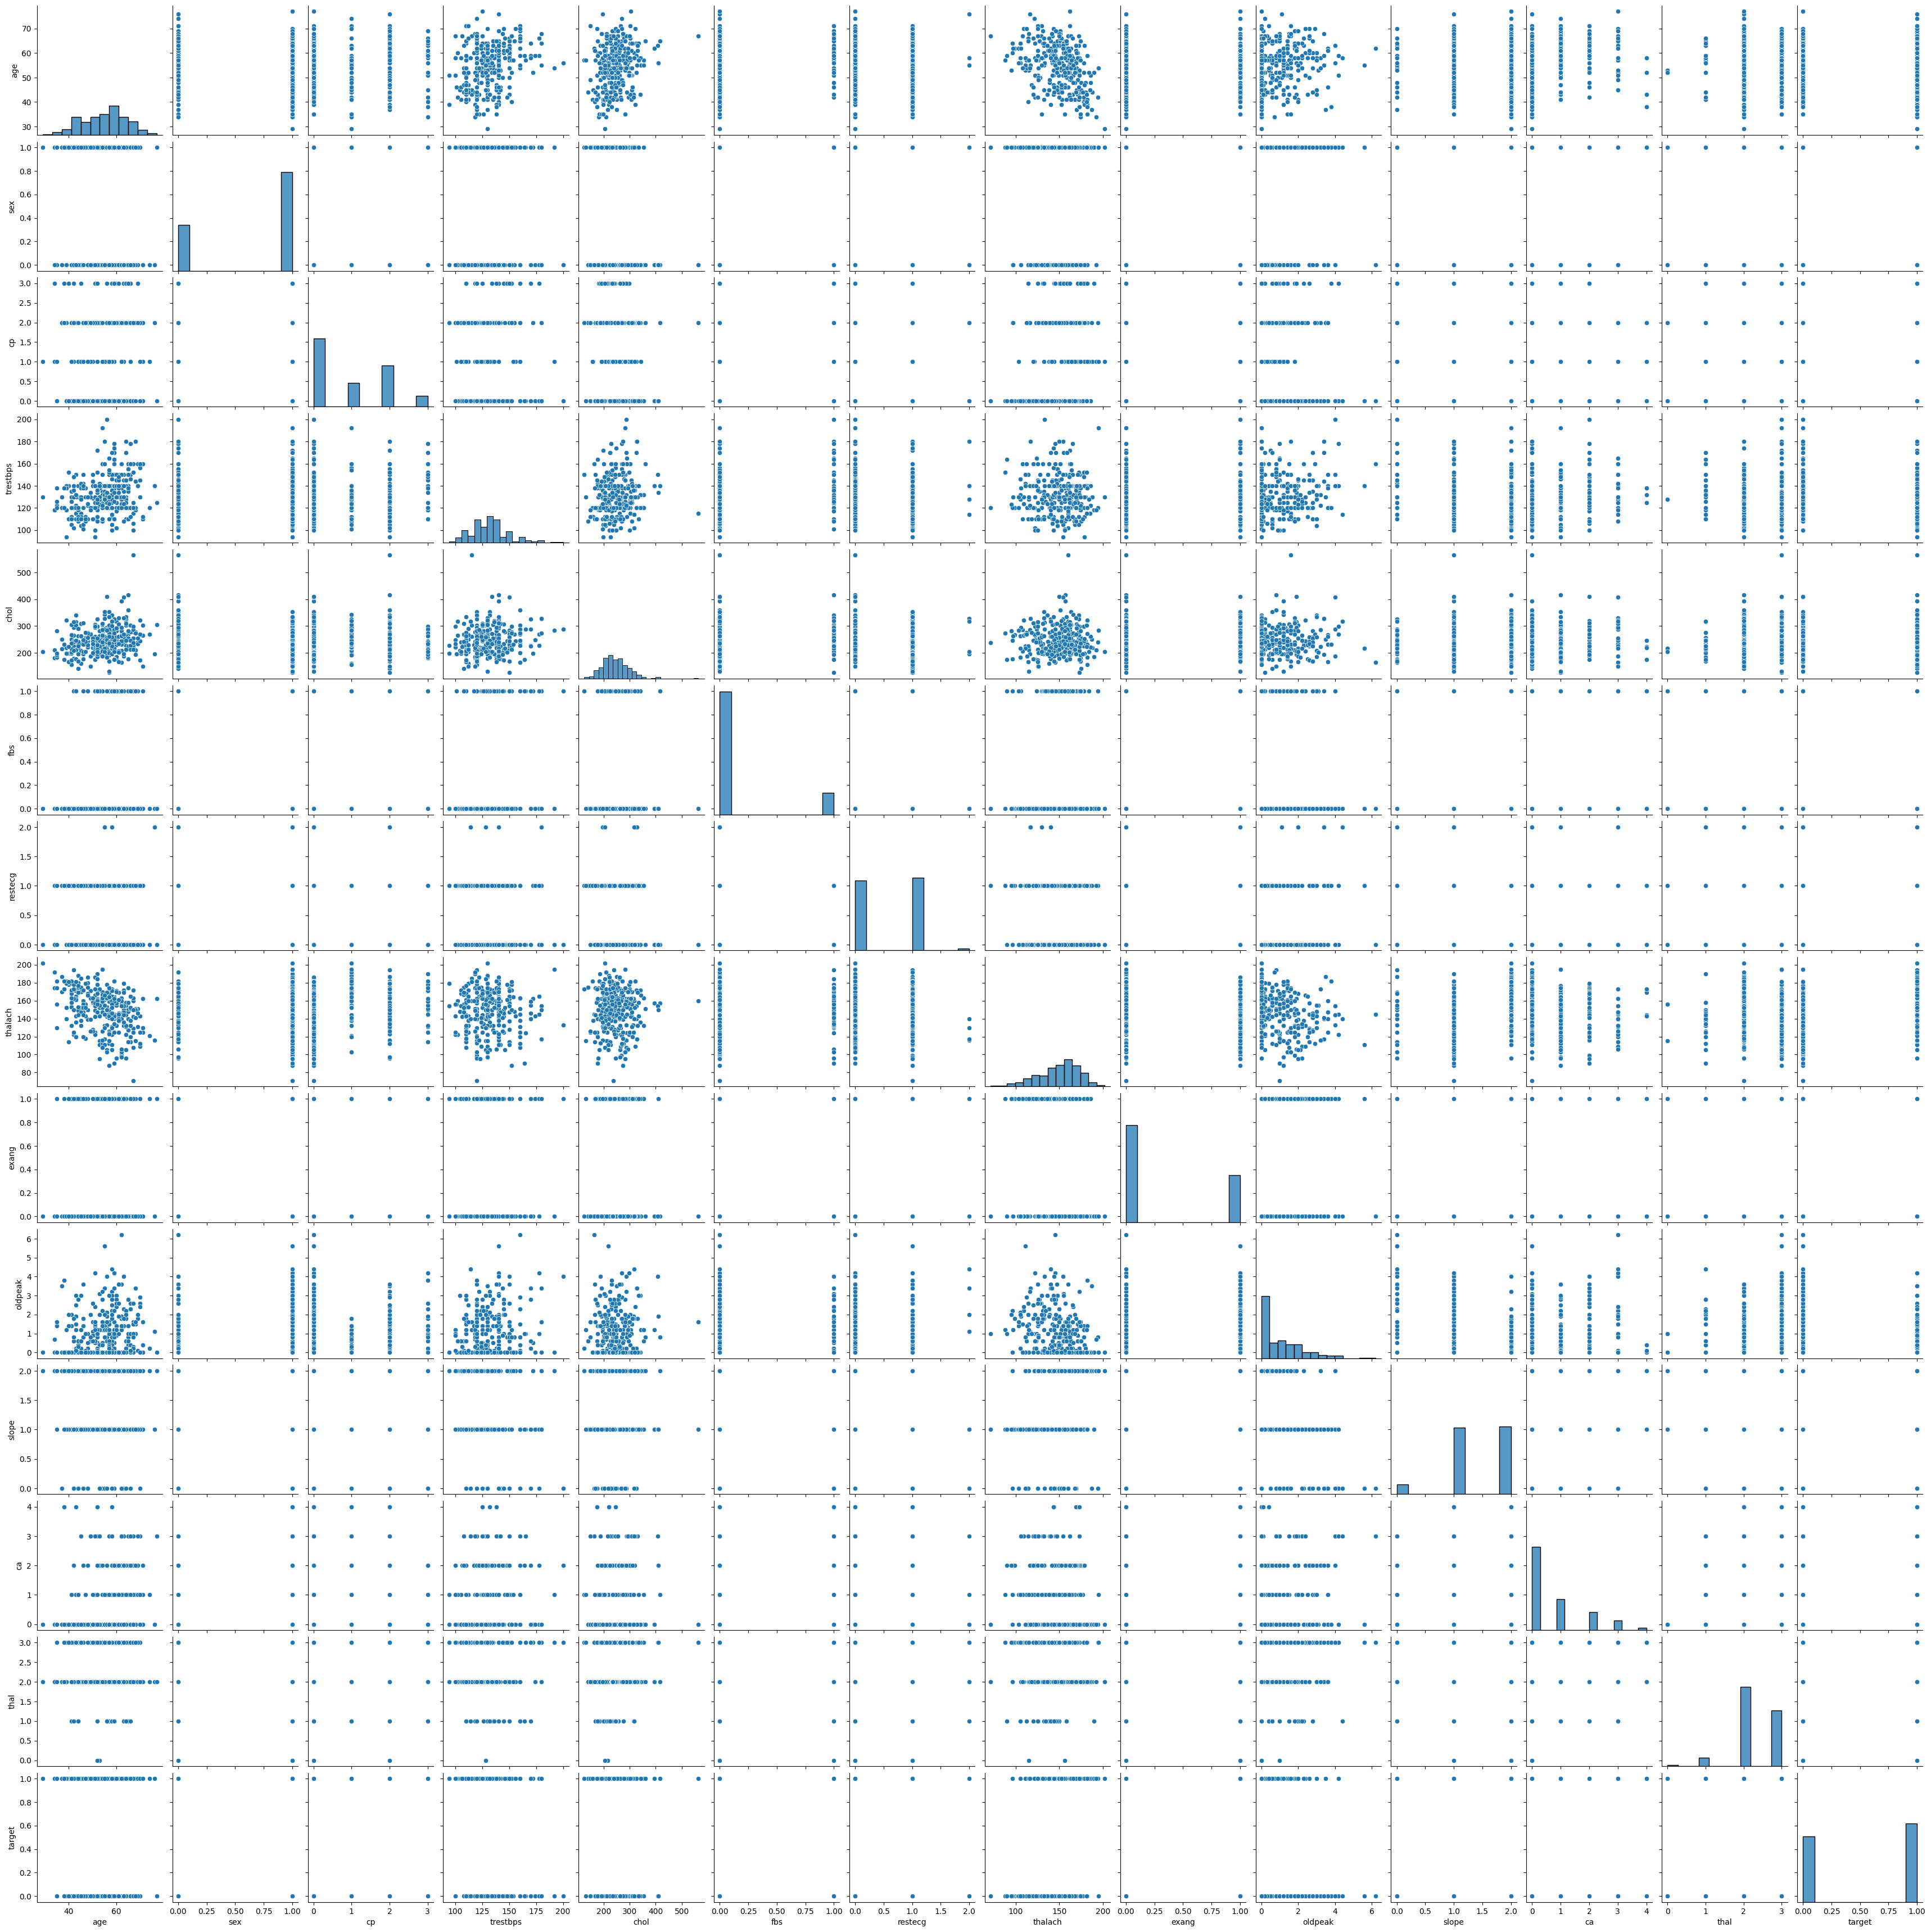

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(data)


<Axes: >

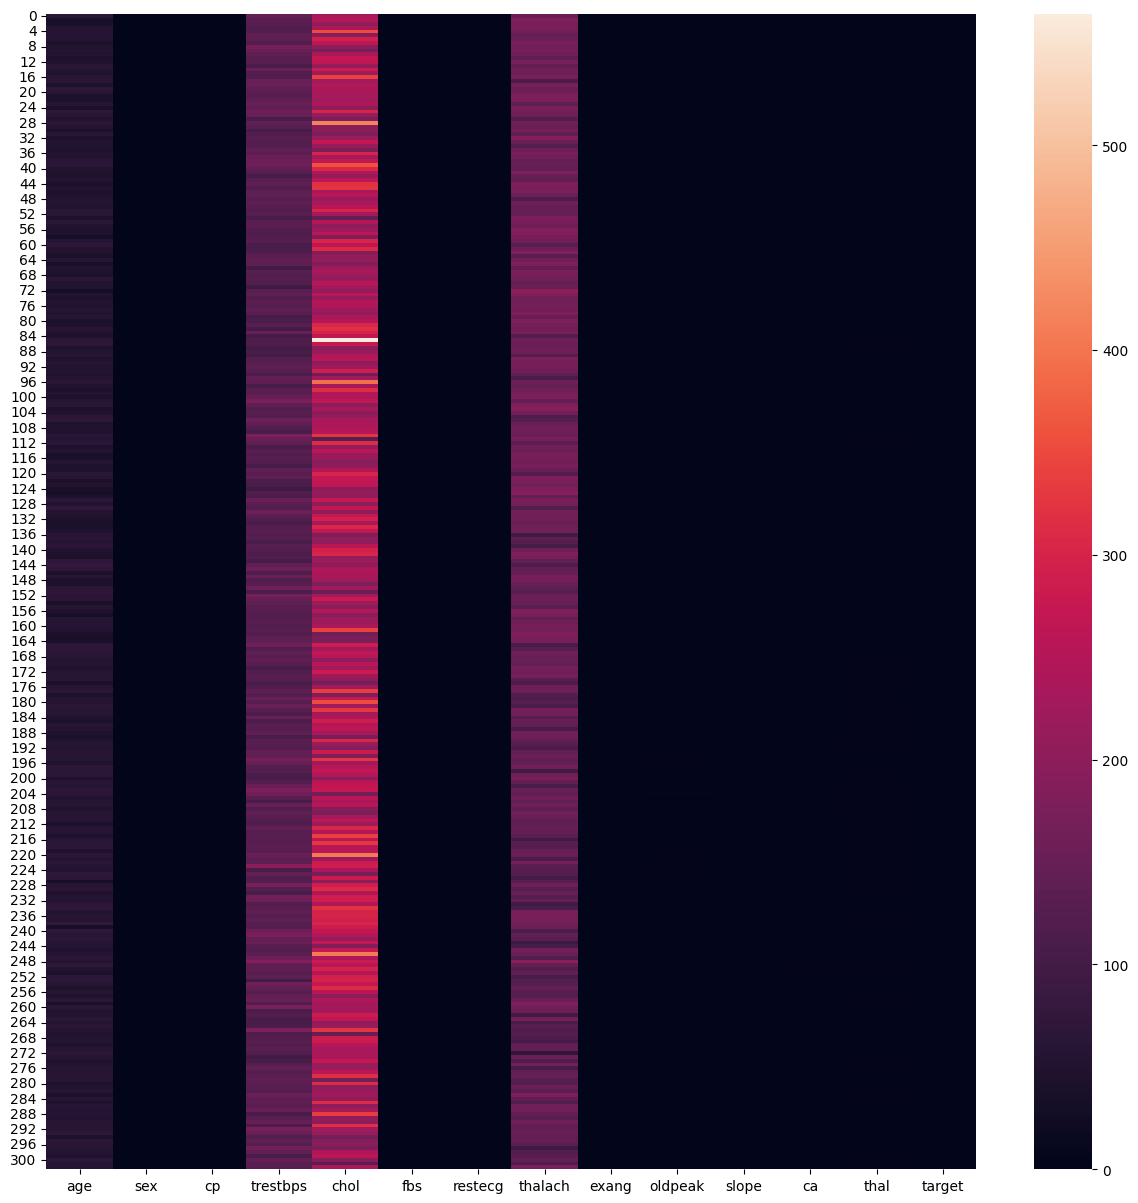

In [ ]:
sns.heatmap(data)

Text(0.5, 1.0, 'Distribution of Age')

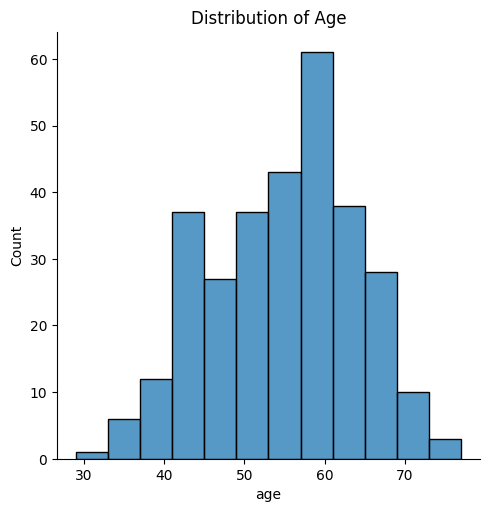

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.displot(data['age'])
plt.title('Distribution of Age')


In [ ]:
print(data['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [ ]:
print(data['target'].unique())


[1, 0]
Categories (2, int64): [0, 1]


In [ ]:
X = data.drop(columns = 'target' , axis = 1)
Y = data['target']

In [ ]:
print(data['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


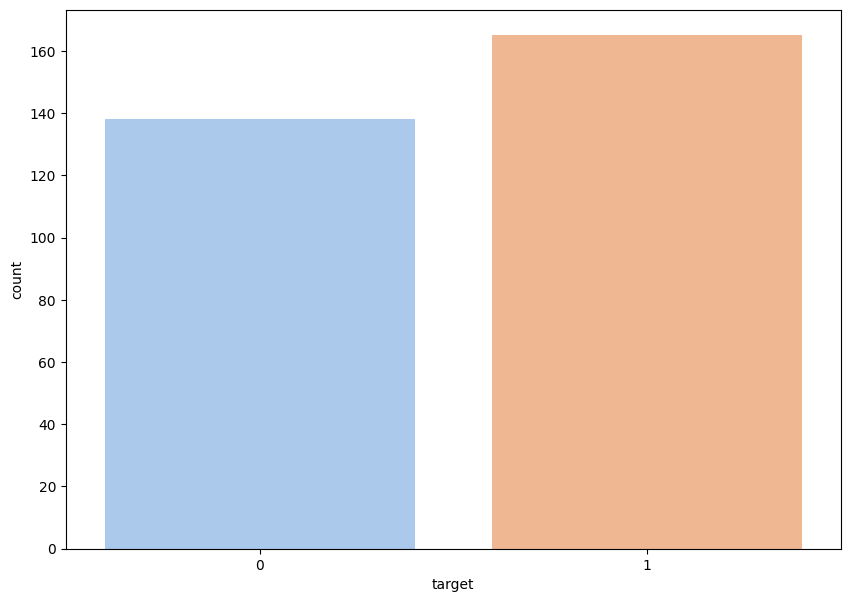

In [ ]:

sns.countplot(x = data['target'] , palette = 'pastel')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' is the column you want to convert
label_encoder = LabelEncoder()
data['trestbps'] = label_encoder.fit_transform(data['trestbps'])

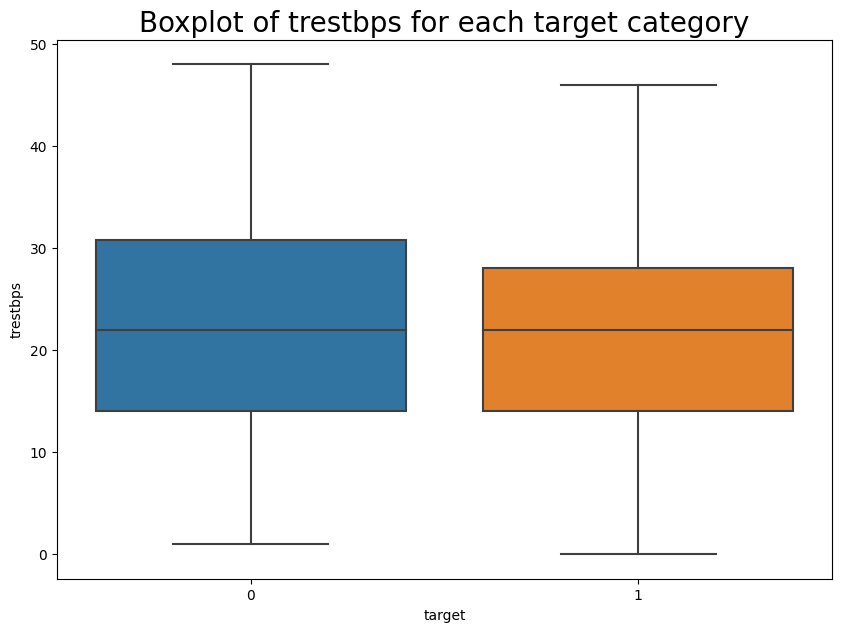

In [ ]:
sns.boxplot(x='target', y='trestbps', data=data)
plt.title('Boxplot of trestbps for each target category', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Relation between Max Heart rate and target')

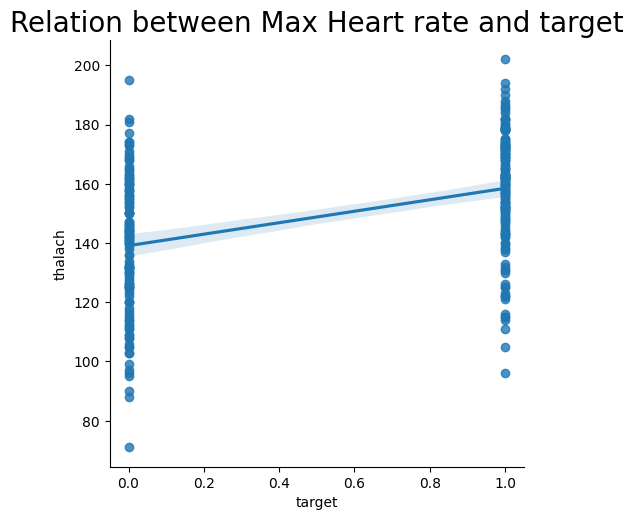

In [ ]:
data['target'] = data['target'].cat.as_ordered()
plt.rcParams['figure.figsize'] = (10, 7)
sns.lmplot(x='target', y='thalach', data=data)
plt.title('Relation between Max Heart rate and target', fontsize = 20)

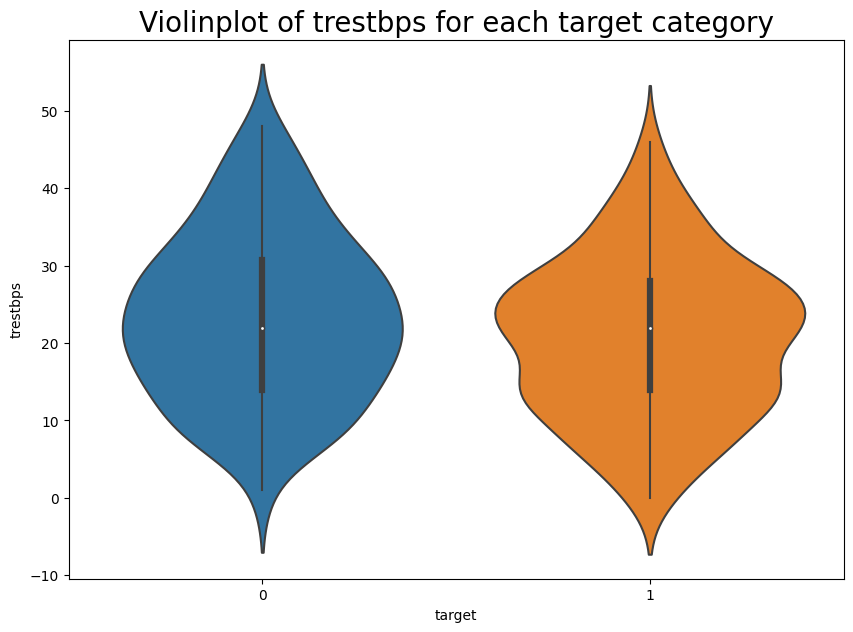

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)

# Assuming 'target' is a categorical variable and 'trestbps' is a numerical variable
sns.violinplot(x='target', y='trestbps', data=data)
plt.title('Violinplot of trestbps for each target category', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Relation of Age and target')

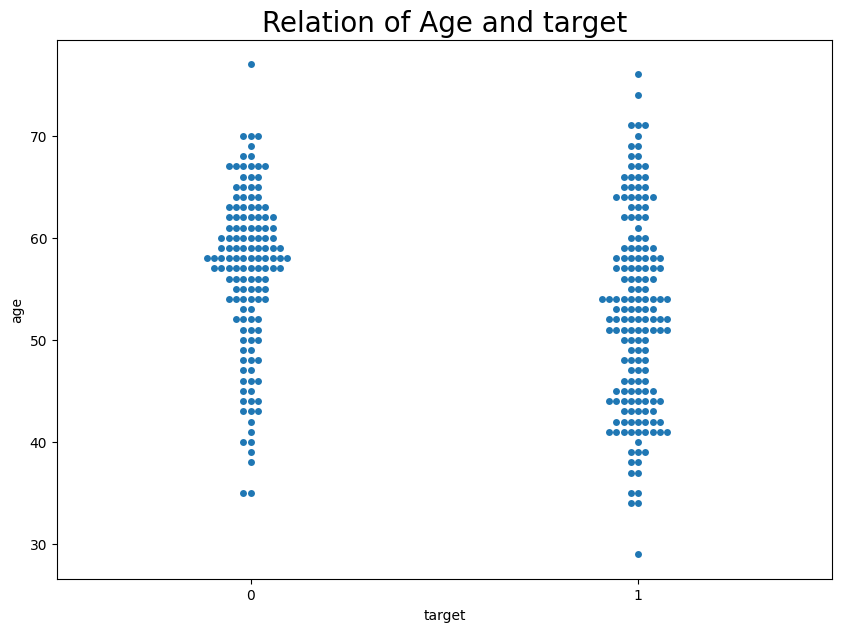

In [ ]:
sns.swarmplot(x = 'target',y ='age', data = data)
plt.title('Relation of Age and target', fontsize = 20)

Text(0.5, 1.0, 'Relation of Sex and target')

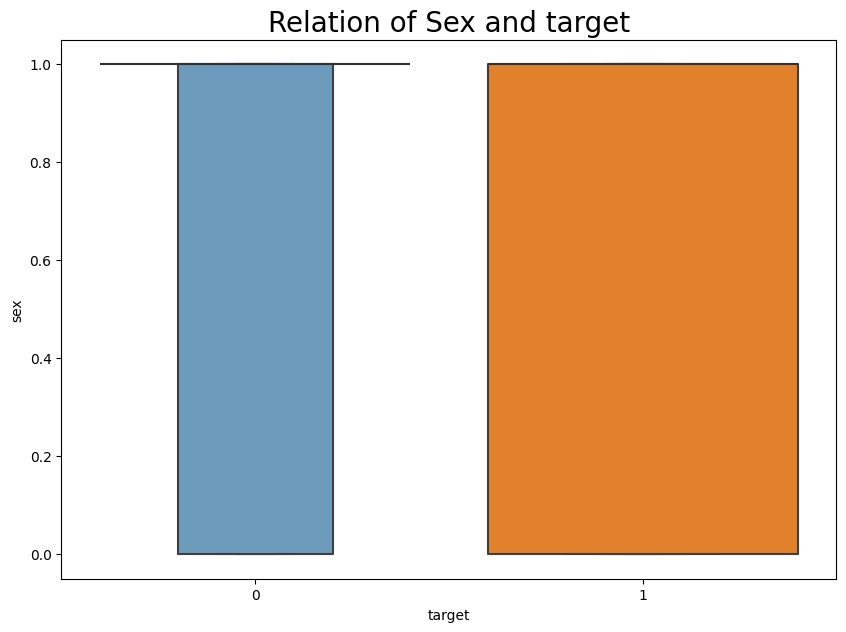

In [ ]:
sns.boxenplot(x = 'target', y='sex', data=data)
plt.title('Relation of Sex and target', fontsize = 20)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relation between Target and Blood disorder-Thalessemia')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


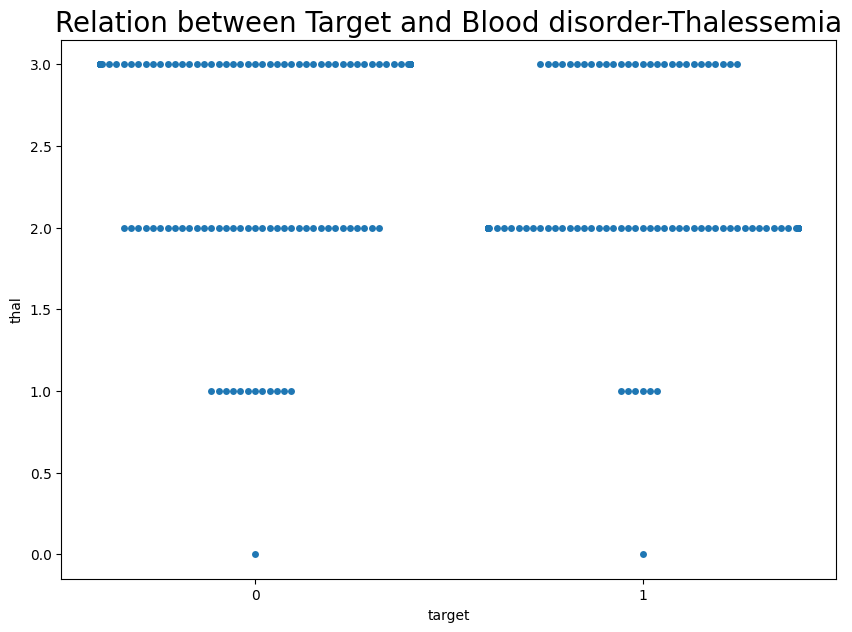

In [ ]:
sns.swarmplot(x ='target', y='thal', data=data)
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20)

Text(0.5, 1.0, 'Checking relation of tresbps with genders to target')

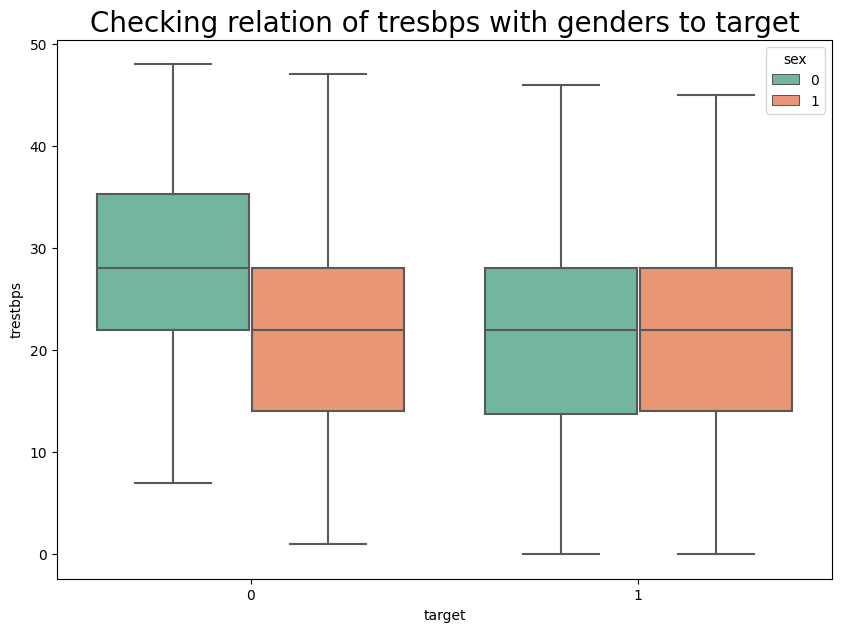

In [ ]:
sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'Set2')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20)

In [ ]:
X = data.drop(columns = 'target' , axis = 1)
Y = data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3        31   233    1        0      150      0      2.3   
1     37    1   2        22   250    0        1      187      0      3.5   
2     41    0   1        22   204    0        0      172      0      1.4   
3     56    1   1        14   236    0        1      178      0      0.8   
4     57    0   0        14   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0        28   241    0        1      123      1      0.2   
299   45    1   3         8   264    0        1      132      0      1.2   
300   68    1   0        30   193    1        1      141      0      3.4   
301   57    1   0        22   131    0        1      115      1      1.2   
302   57    0   1        22   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , stratify=Y , random_state =2)
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", Y_train.shape)
print("Shape of y_test :", Y_test.shape)

Shape of x_train : (242, 13)
Shape of x_test : (61, 13)
Shape of y_train : (242,)
Shape of y_test : (61,)


In [ ]:
model = LogisticRegression()
model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

X_train_pred = model.predict(X_train)
training_data_acc = accuracy_score(X_train_pred , Y_train)

In [ ]:
print(training_data_acc)

0.859504132231405


In [ ]:
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred , Y_test)

In [ ]:
print(test_data_acc)

0.8360655737704918


In [ ]:
input_data = (57 , 0 , 0 ,120 , 354 , 0 , 1 , 163 , 1 , 0.6 , 2 , 0 ,2 )

in_data_nparr = np.asarray(input_data)
in_data_reshape = in_data_nparr.reshape(1 , -1)

prediction = model.predict(in_data_reshape)
print(prediction)

if (prediction[0]==0):
  print("Dont Have HEART disease :)")

else :
  print("You have a HEART CONDITION :(")

[0]
Dont Have HEART disease :)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
f1 = f1_score(Y_test , X_test_pred)
print(f1)

0.8484848484848486


In [ ]:
recall = recall_score(Y_test, X_test_pred)
precision = precision_score(Y_test, X_test_pred)

In [ ]:
print(recall)

0.8484848484848485


In [ ]:
print(precision)

0.8484848484848485


In [ ]:
fpr, tpr, _ = roc_curve(Y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

In [ ]:
print(roc_auc)

0.8982683982683982


<Axes: >

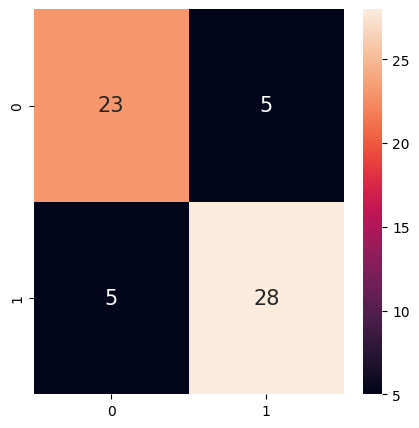

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, X_test_pred)
plt.rcParams['figure.figsize'] = (5, 5)c
sns.heatmap(cm, annot = True, annot_kws = {'size':15})